In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt

import permanent_fast
from perm import permanent, haar_gen

Сравнени с `c++` функции с `python + numba`

In [5]:
n = np.arange(2, 26)

cpp_time_mean = []
cpp_time_std = []

python_time_mean = []
python_time_std = []

number_of_trials = 5

for i in n:
    cpp_time = []
    python_time = []
    julia_time = []
    for _ in range(number_of_trials):
        A = haar_gen(i)

        start = time.time()
        x = permanent_fast.permanent(A)
        cpp_time.append(time.time() - start)

        start = time.time()
        y = permanent(A)
        python_time.append(time.time() - start)
        assert np.allclose(x, y)

    cpp_time_mean.append(np.mean(cpp_time))
    cpp_time_std.append(np.std(cpp_time))
    python_time_mean.append(np.mean(python_time))
    python_time_std.append(np.std(python_time))

    print(f"n={i} C++: {cpp_time_mean[-1]:.4f} +- {cpp_time_std[-1]:.4f} s, Python: {python_time_mean[-1]:.4f} +- {python_time_std[-1]:.4f} s,  C++/Python {python_time_mean[-1]/cpp_time_mean[-1]:.2f}x")

n=2 C++: 0.0000 +- 0.0000 s, Python: 0.0000 +- 0.0000 s,  C++/Python 0.37x
n=3 C++: 0.0000 +- 0.0000 s, Python: 0.0000 +- 0.0000 s,  C++/Python 0.22x
n=4 C++: 0.0000 +- 0.0000 s, Python: 0.0000 +- 0.0000 s,  C++/Python 1.23x
n=5 C++: 0.0000 +- 0.0000 s, Python: 0.0000 +- 0.0000 s,  C++/Python 1.84x
n=6 C++: 0.0000 +- 0.0000 s, Python: 0.0000 +- 0.0000 s,  C++/Python 1.43x
n=7 C++: 0.0000 +- 0.0000 s, Python: 0.0000 +- 0.0000 s,  C++/Python 1.88x
n=8 C++: 0.0000 +- 0.0000 s, Python: 0.0000 +- 0.0000 s,  C++/Python 1.38x
n=9 C++: 0.0000 +- 0.0000 s, Python: 0.0000 +- 0.0000 s,  C++/Python 4.36x
n=10 C++: 0.0000 +- 0.0000 s, Python: 0.0001 +- 0.0000 s,  C++/Python 6.78x
n=11 C++: 0.0000 +- 0.0000 s, Python: 0.0001 +- 0.0000 s,  C++/Python 5.96x
n=12 C++: 0.0000 +- 0.0000 s, Python: 0.0002 +- 0.0001 s,  C++/Python 5.54x
n=13 C++: 0.0001 +- 0.0000 s, Python: 0.0004 +- 0.0001 s,  C++/Python 6.60x
n=14 C++: 0.0001 +- 0.0000 s, Python: 0.0010 +- 0.0003 s,  C++/Python 6.85x
n=15 C++: 0.0002 +- 

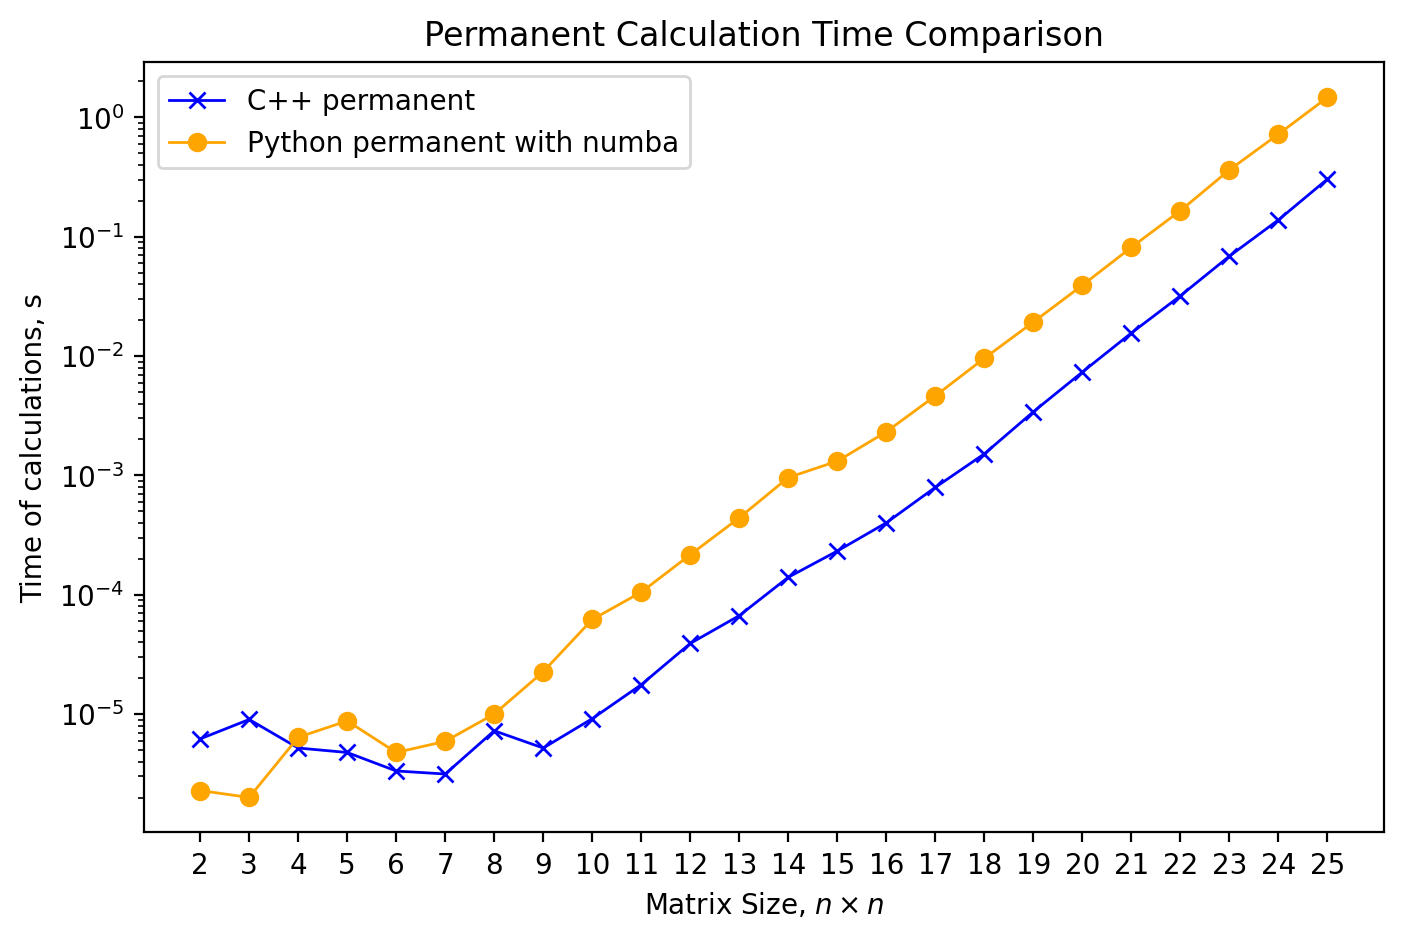

In [6]:
plt.figure(figsize = (8,5), dpi = 200)
plt.plot(n, cpp_time_mean, marker = 'x', label='C++ permanent', color = 'blue', lw= 1)
plt.plot(n, python_time_mean, label='Python permanent with numba', marker='o', color = 'orange', lw = 1)
plt.xlabel(r'Matrix Size, $n \times n$')
plt.ylabel(r'Time of calculations, s')
plt.title('Permanent Calculation Time Comparison')
plt.yscale('log')
plt.xticks(n)
plt.legend()
plt.show()

В среднем выигрыш в `5` раз!